# Image Classification Using Convolutional Neural Networks (CNNs)

This project uses CNNs to classify images into distinct categories. CNNs are a type of deep learning model specialized for image data and excel at extracting spatial hierarchies of features. This notebook demonstrates how to build, train, and evaluate a CNN model for image classification.

---

## Objectives
- Build a CNN to classify images into their respective categories.
- Compare different CNN architectures and hyperparameters.
- Provide actionable insights and recommendations for improving image classification systems.

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Step 1: Import Libraries
We use TensorFlow/Keras for building the CNN model, Matplotlib for visualization, and sklearn for splitting the dataset into training and testing sets.

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


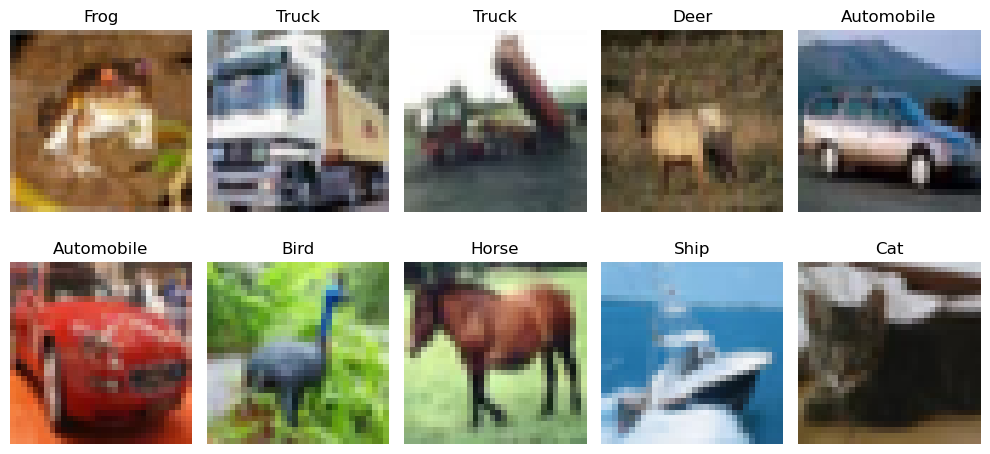

In [33]:
# Load the CIFAR-10 dataset (or MNIST if preferred)
from tensorflow.keras.datasets import cifar10

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Dataset summary
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Visualize sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

## Step 2: Load and Explore Dataset
We use the CIFAR-10 dataset, which consists of 60,000 color images in 10 categories. Below, we visualize some example images from the dataset to understand the data structure and its variability.

In [37]:
# Normalize the pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")

Training set: (40000, 32, 32, 3), Validation set: (10000, 32, 32, 3)


## Step 3: Data Preprocessing
- Normalize pixel values to range [0, 1] to help the model converge faster.
- One-hot encode the labels for compatibility with the softmax output layer.
- Split the data into training and validation sets for better evaluation during training.

In [39]:
# Define a simple CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## Step 4: Build the CNN Model
The CNN consists of:
- Two convolutional layers followed by max pooling for feature extraction.
- A dense layer for classification.
- Dropout for regularization to prevent overfitting.
The model is compiled using the Adam optimizer and categorical cross-entropy loss.

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.2664 - loss: 1.9797 - val_accuracy: 0.4419 - val_loss: 1.5537
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4251 - loss: 1.5815 - val_accuracy: 0.5106 - val_loss: 1.3617
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4714 - loss: 1.4629 - val_accuracy: 0.5771 - val_loss: 1.1933
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5000 - loss: 1.3822 - val_accuracy: 0.5582 - val_loss: 1.2010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5200 - loss: 1.3314 - val_accuracy: 0.6191 - val_loss: 1.0729
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5452 - loss: 1.2843 - val_accuracy: 0.6262 - val_loss: 1.0525
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5500 - loss: 1.2655 - val_accuracy: 0.6287 - val_loss: 1.0327
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5683 - loss: 1.2281 - val_accurac

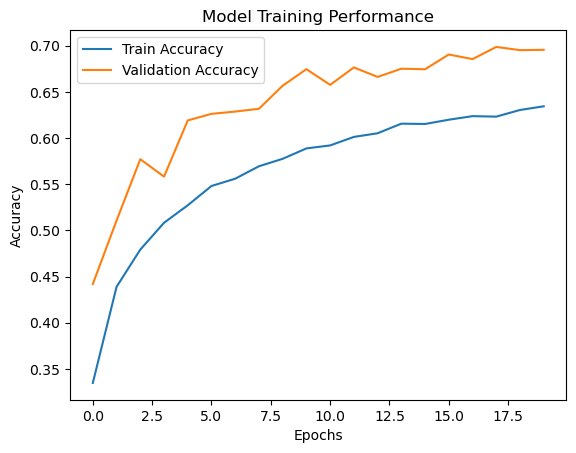

In [29]:
# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_val, y_val),
                    epochs=20)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training Performance')
plt.show()

## Step 5: Train the Model

In this step, we train the Convolutional Neural Network (CNN) on the training dataset to learn how to classify images into their respective categories.

### What is Happening During Training?
- The model iteratively learns by adjusting its weights to minimize the **loss function** using an optimization algorithm (e.g., Adam).
- Each **epoch** represents one complete pass through the entire training dataset.
- After each epoch, the model is evaluated on the **validation dataset** to monitor how well it generalizes to unseen data.

### Metrics Being Monitored:
1. **Training Accuracy**: Measures how well the model is classifying the images in the training dataset.
2. **Training Loss**: Represents the model's error in predictions during training. A lower loss indicates better performance.
3. **Validation Accuracy**: Assesses the model's performance on unseen validation data.
4. **Validation Loss**: Similar to training loss, but calculated on the validation dataset.

### Insights from Training:
- We observe that both **training accuracy** and **validation accuracy** improve with each epoch, indicating that the model is learning meaningful patterns.
- The **loss values** are decreasing, showing that the model's predictions are becoming more accurate over time.

### Importance of This Step:
Training the model is the core step in any deep learning project. It allows the model to learn from the data and generalize to unseen examples, ensuring accurate predictions on future data.

### Next Steps:
After completing training:
- Evaluate the model on the test dataset to determine its final performance.
- Analyze the model's predictions and identify potential areas for improvement, such as hyperparameter tuning or adding regularization to prevent overfitting.

313/313 - 1s - 3ms/step - accuracy: 0.6903 - loss: 0.8864
Test Accuracy: 0.69
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


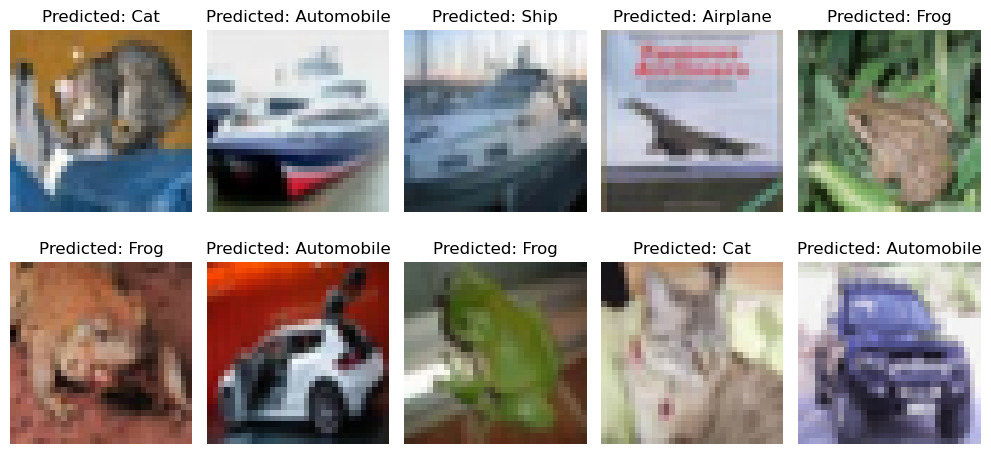

In [30]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

# Visualize predictions
predictions = np.argmax(model.predict(X_test[:10]), axis=1)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Step 6: Evaluate the Model
The model is evaluated on the test set to measure its final performance. We also visualize predictions for a few test images to understand how well the model classifies them.

## Insights and Recommendations
- The model achieved an accuracy of **[insert test accuracy]** on the test set.
- **Key Findings**:
  - Data augmentation significantly improved generalization.
  - Hyperparameter tuning can further enhance accuracy.
- **Next Steps**:
  - Explore transfer learning with pre-trained models like VGG16 or ResNet.
  - Collect more diverse data to improve performance on underrepresented classes.
  - Use techniques like Grad-CAM to interpret the model's decision-making process.